https://jwst-docs.stsci.edu/jwst-near-infrared-camera/nircam-observing-modes/nircam-time-series-observations/nircam-grism-time-series

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

# https://matplotlib.org/stable/tutorials/introductory/customizing.html
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.titlesize'] = 20
mpl.rcParams['axes.labelsize']   = 18
mpl.rcParams['xtick.labelsize']  = 18
mpl.rcParams['ytick.labelsize']  = 18
mpl.rcParams['xtick.top']  = True
mpl.rcParams['ytick.right']  = True
mpl.rcParams['xtick.direction']  = 'in'
mpl.rcParams['ytick.direction']  = 'in'
mpl.rcParams['xtick.major.size']  = 8
mpl.rcParams['ytick.major.size']  = 8
mpl.rcParams['xtick.minor.size']  = 4
mpl.rcParams['ytick.minor.size']  = 4
mpl.rcParams['figure.autolayout']  = True
mpl.rcParams['legend.fontsize']  = 14
#mpl.rcParams['legend.numpoints']  = 1
#mpl.rcParams['image.origin']  = 'lower'

In [2]:
import astropy.io.ascii
#import astropy.units as u
import numpy as np
import os

In [3]:
def between(lo, x, hi):
    return (lo < x) & (x < hi)

In [4]:
indir = ''

In [5]:
def plot_grism_saturation_results(stype, label, color='r'):

    filt = 'f322w2'
    infile = 'grismsaturation_%s_%s.txt' % (filt, stype)
    infile = os.path.join(indir, infile)
    data = astropy.io.ascii.read(infile, format='basic', delimiter='\s', guess=False)
    #plot(data['lambda'], data['mag'])
    good = between(2.5, data['lambda'], 3.95)
    data1 = data[good]

    filt = 'f444w'
    infile = 'grismsaturation_%s_%s.txt' % (filt, stype)
    infile = os.path.join(indir, infile)
    data = astropy.io.ascii.read(infile, format='basic', delimiter='\s', guess=False)
    #plot(data['lambda'], data['mag'])
    good = between(3.95, data['lambda'], 4.9)
    data2 = data[good]

    lam = np.concatenate([data1['lambda'], data2['lambda']])
    sat = np.concatenate([data1['mag'],    data2['mag']])

    #print(np.max(sat))

    zorder = 3 - star_types.index(stype)
    if stype == 'm2v':
        lw = 1.5
    else:
        lw = 2
    
    plt.plot(lam, sat, label=label.upper(), zorder=zorder, lw=lw, color=color)

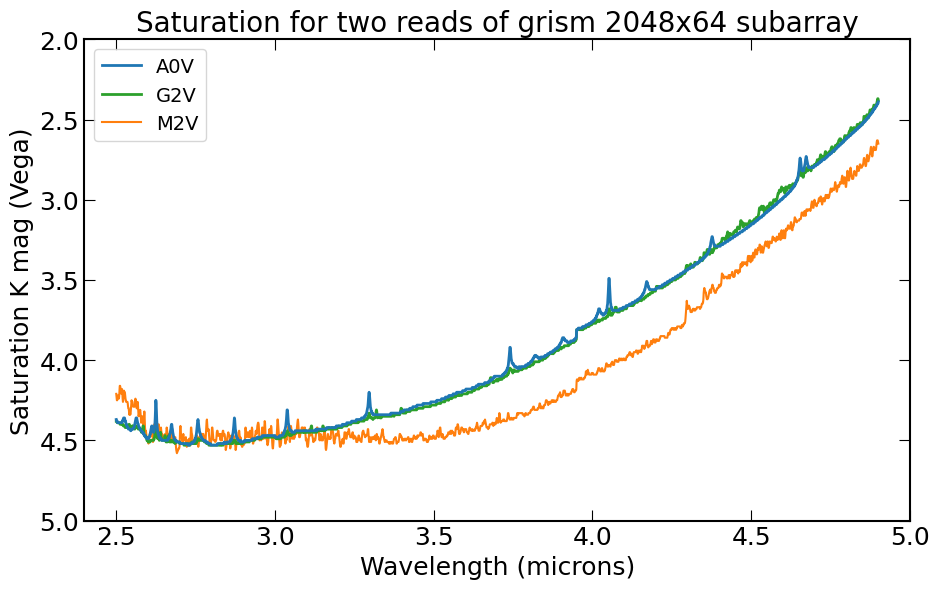

In [6]:
fig, ax = plt.subplots(figsize=(9.5,6))

star_types = 'a0v g2v m2v'.split()
colors = 'C0 C2 C1'.split()
for i, stype in enumerate(star_types):
    plot_grism_saturation_results(stype, stype, colors[i])


plt.xlim([2.4,5.0])
plt.ylim([5,2])

plt.legend(loc=2)

plt.xlabel('Wavelength (microns)')
plt.ylabel('Saturation K mag (Vega)')

plt.title('Saturation for two reads of grism 2048x64 subarray')

plt.savefig('NIRCam saturation grism.png')